<h1 style="color: lightblue;">CAMBIO EN RAMA BURGOS</h1>
<h1></h1>

# PRIMER ENTREGA

#### Entorno de trabajo

In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression


%matplotlib inline

#### lectura de datos

In [10]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv")

# a. Diseño de solución propuesto

En primer instancia planteamos el uso de un modelo de regresión logística, puesto que dicho modelo es adecuado para problemas de clasificación binaria, como es el caso de este, donde se trata de predecir si un empleado abandonará su empleo o no.

Sin embargo también planteamos la alternativa de usar Árboles de decisión, ya que son un modelo de aprendizaje supervisado que puede ser utilizado para problemas de clasificación y regresión, con la desventaja que pueden ser menos precisos que los modelos de regresión logística.

# b. Limpieza y transformación de los datos

#### Información de cada tabla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB
None


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0


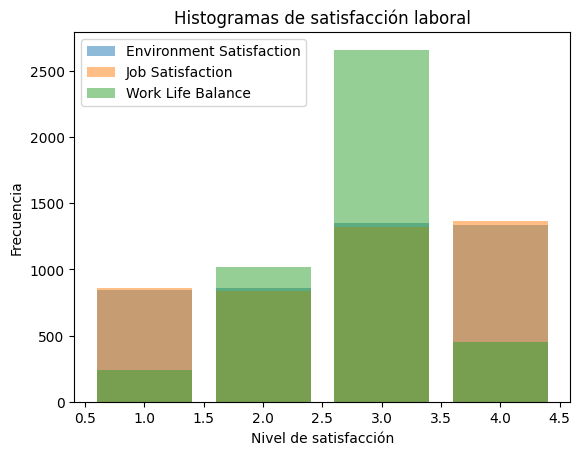

In [11]:
print(df_employee_survey.info())
display(df_employee_survey.head(3))


values_1 = df_employee_survey['EnvironmentSatisfaction'].value_counts()
values_2 = df_employee_survey['JobSatisfaction'].value_counts()
values_3 = df_employee_survey['WorkLifeBalance'].value_counts()

fig, ax = plt.subplots()

# Crear los histogramas
ax.bar(values_1.index, values_1, alpha=0.5, label='Environment Satisfaction')
ax.bar(values_2.index, values_2, alpha=0.5, label='Job Satisfaction')
ax.bar(values_3.index, values_3, alpha=0.5, label='Work Life Balance')

ax.set_title('Histogramas de satisfacción laboral')
ax.set_xlabel('Nivel de satisfacción')
ax.set_ylabel('Frecuencia')

ax.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


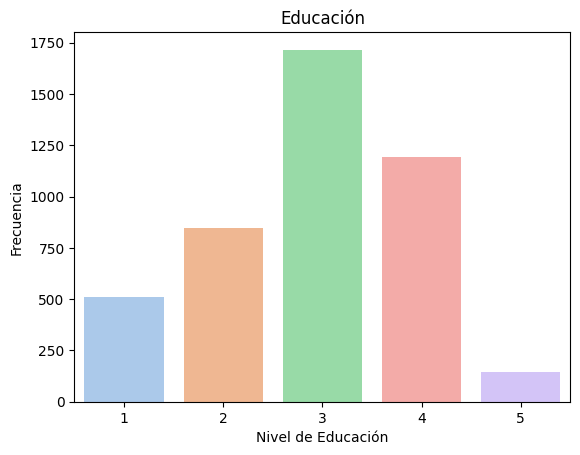

In [12]:
print(df_general.info())
display(df_general.head(3))


values = df_general['Education'].value_counts()
sns.barplot(x=values.index, y=values, palette='pastel')

plt.title('Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
None


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3


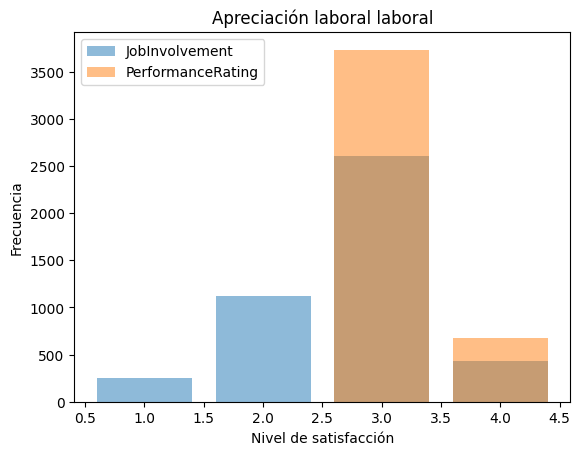

In [13]:
print(df_manager_survey.info())
display(df_manager_survey.head(3))


values_1 = df_manager_survey['JobInvolvement'].value_counts()
values_2 = df_manager_survey['PerformanceRating'].value_counts()

fig, ax = plt.subplots()

# Crear los histogramas
ax.bar(values_1.index, values_1, alpha=0.5, label='JobInvolvement')
ax.bar(values_2.index, values_2, alpha=0.5, label='PerformanceRating')

ax.set_title('Apreciación laboral laboral')
ax.set_xlabel('Nivel de satisfacción')
ax.set_ylabel('Frecuencia')

ax.legend()
plt.show()

In [14]:
df_time_work.info()
df_time_work.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1;6 to 4410;6
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   EmployeeID;mean_time  4410 non-null   int64
dtypes: int64(1)
memory usage: 68.9+ KB


,EmployeeID;mean_time
1;6,8702
2;7,316
3;6,8161


Corrección en lectura de la tabla 'time_work' Que esta separada por punto y coma

#### Lectura de tabla separada por ;

In [15]:
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")
df_time_work.info()
display(df_time_work.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  4410 non-null   int64 
 1   mean_time   4410 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.0+ KB


,EmployeeID,mean_time
0,1,"6,8702"
1,2,"7,316"
2,3,"6,8161"
3,4,"6,7892"
4,5,"7,8776"


#### Union de las tablas

In [16]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")

In [17]:
df = df_employee_survey.merge(df_general, on="EmployeeID")
df = df.merge(df_manager_survey, on="EmployeeID")
df = df.merge(df_time_work, on="EmployeeID")

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,"6,8702"
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,"7,316"
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,"6,8161"


#### Columnas con un solo valor

##### Consulta

In [18]:
# Obtener la cantidad de valores únicos en cada columna
nunique_values = df.nunique()

# Seleccionar las columnas con un solo valor
single_value_columns = nunique_values[nunique_values == 1].index

print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [19]:
df[['EmployeeCount', 'Over18', 'StandardHours']]

,EmployeeCount,Over18,StandardHours
0,1,Y,8
1,1,Y,8
2,1,Y,8
3,1,Y,8
4,1,Y,8
...,...,...,...
4405,1,Y,8
4406,1,Y,8
4407,1,Y,8
4408,1,Y,8


##### Eliminación de columnas con un solo valor y EmployeeID

In [43]:
df_drop_unique = df.drop(["EmployeeID","EmployeeCount", "Over18", "StandardHours"], axis=1)

nunique_values = df_drop_unique.nunique()
single_value_columns = nunique_values[nunique_values == 1].index
print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index([], dtype='object')


#### Correción del tipo de cada variable

In [44]:
df_type = df_drop_unique

#Diccionario
df_type['EnvironmentSatisfaction'] = df_type['EnvironmentSatisfaction'].astype('category')
df_type['JobSatisfaction'] = df_type['JobSatisfaction'].astype('category')
df_type['WorkLifeBalance'] = df_type['WorkLifeBalance'].astype('category')
df_type['Education'] = df_type['Education'].astype('category')
df_type['JobInvolvement'] = df_type['JobInvolvement'].astype('category')
df_type['PerformanceRating'] = df_type['PerformanceRating'].astype('category')

#Asignadas
df_type['JobLevel'] = df_type['JobLevel'].astype('category')
df_type['StockOptionLevel'] = df_type['StockOptionLevel'].astype('category')
df_type['TrainingTimesLastYear'] = df_type['TrainingTimesLastYear'].astype('category')
#df_type['NumCompaniesWorked'] = df_type['NumCompaniesWorked'].astype('category')

df_type['mean_time'] = df_type['mean_time'].str.replace(',', '.')
df_type['mean_time'] = df_type['mean_time'].astype('float64')

#Object
df_type['Attrition'] = df_type['Attrition'].astype('category')
df_type['BusinessTravel'] = df_type['BusinessTravel'].astype('category')
df_type['Department'] = df_type['Department'].astype('category')
df_type['EducationField'] = df_type['EducationField'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')
df_type['JobRole'] = df_type['JobRole'].astype('category')
df_type['MaritalStatus'] = df_type['MaritalStatus'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')

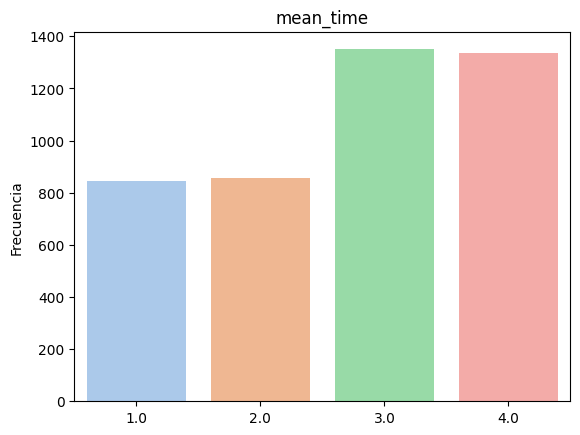

In [45]:
values = df_type['EnvironmentSatisfaction'].value_counts()
sns.barplot(x=values.index, y=values, palette='pastel')

plt.title('mean_time')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

In [46]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EnvironmentSatisfaction  4385 non-null   category
 1   JobSatisfaction          4390 non-null   category
 2   WorkLifeBalance          4372 non-null   category
 3   Age                      4410 non-null   int64   
 4   Attrition                4410 non-null   category
 5   BusinessTravel           4410 non-null   category
 6   Department               4410 non-null   category
 7   DistanceFromHome         4410 non-null   int64   
 8   Education                4410 non-null   category
 9   EducationField           4410 non-null   category
 10  Gender                   4410 non-null   category
 11  JobLevel                 4410 non-null   category
 12  JobRole                  4410 non-null   category
 13  MaritalStatus            4410 non-null   category
 14  MonthlyI

#### Tratamiento para nulos

In [47]:
df_no_nulos = df_type

median_TotalWorkingYears = df_no_nulos['TotalWorkingYears'].median()
median_NumCompaniesWorked = df_no_nulos['NumCompaniesWorked'].median()
mode_WorkLifeBalance = df_no_nulos['WorkLifeBalance'].mode().iloc[0]
mode_JobSatisfaction = df_no_nulos['JobSatisfaction'].mode().iloc[0]
mode_EnvironmentSatisfaction = df_no_nulos['EnvironmentSatisfaction'].mode().iloc[0]


df_no_nulos['TotalWorkingYears'].fillna(median_TotalWorkingYears, inplace=True)
df_no_nulos['NumCompaniesWorked'].fillna(median_NumCompaniesWorked, inplace=True)
df_no_nulos['WorkLifeBalance'].fillna(mode_WorkLifeBalance, inplace=True)
df_no_nulos['JobSatisfaction'].fillna(mode_JobSatisfaction, inplace=True)
df_no_nulos['EnvironmentSatisfaction'].fillna(mode_EnvironmentSatisfaction, inplace=True)

In [48]:
#No se había realizado la conversión de tipo hasta que no se tratara los nulos
df_no_nulos['NumCompaniesWorked'] = df_no_nulos['NumCompaniesWorked'].astype('category')

In [49]:
df_no_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EnvironmentSatisfaction  4410 non-null   category
 1   JobSatisfaction          4410 non-null   category
 2   WorkLifeBalance          4410 non-null   category
 3   Age                      4410 non-null   int64   
 4   Attrition                4410 non-null   category
 5   BusinessTravel           4410 non-null   category
 6   Department               4410 non-null   category
 7   DistanceFromHome         4410 non-null   int64   
 8   Education                4410 non-null   category
 9   EducationField           4410 non-null   category
 10  Gender                   4410 non-null   category
 11  JobLevel                 4410 non-null   category
 12  JobRole                  4410 non-null   category
 13  MaritalStatus            4410 non-null   category
 14  MonthlyI

# c. Análisis exploratorio de los datos

#### Attrition (Categorica) vs catergoricas

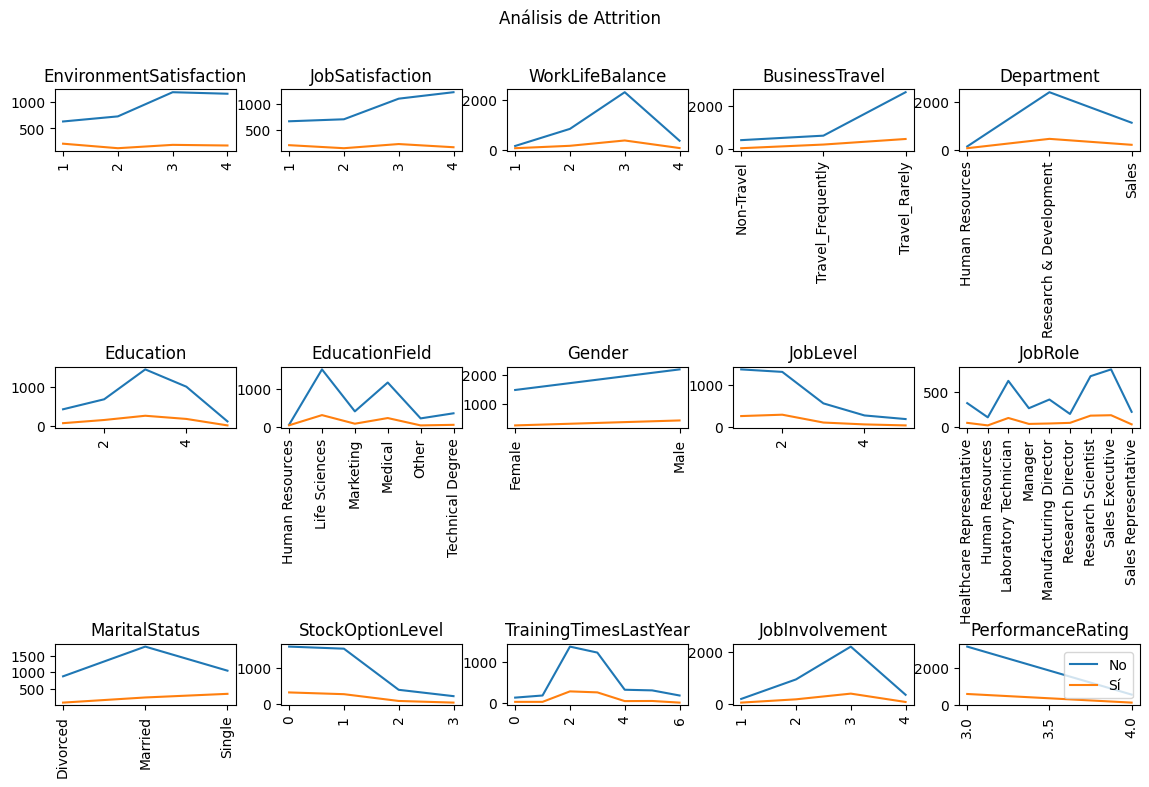

In [50]:
fig, axs = plt.subplots(3, 5, figsize=(14, 8))

gráficos = [
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'Gender',
    'JobLevel',
    'JobRole',
    'MaritalStatus',
    'StockOptionLevel',
    'TrainingTimesLastYear',
    'JobInvolvement',
    'PerformanceRating',
]

for i, gráfico in enumerate(gráficos):
    axs[i // 5, i % 5].plot(df_no_nulos.groupby(gráfico)['Attrition'].value_counts().unstack())
    axs[i // 5, i % 5].set_title(gráfico)
    # Girar las etiquetas del eje x
    axs[i // 5, i % 5].set_xticklabels(axs[i // 5, i % 5].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.25, hspace=3.5)
plt.legend(['No', 'Sí'], loc='lower right')
plt.suptitle('Análisis de Attrition')
plt.show()

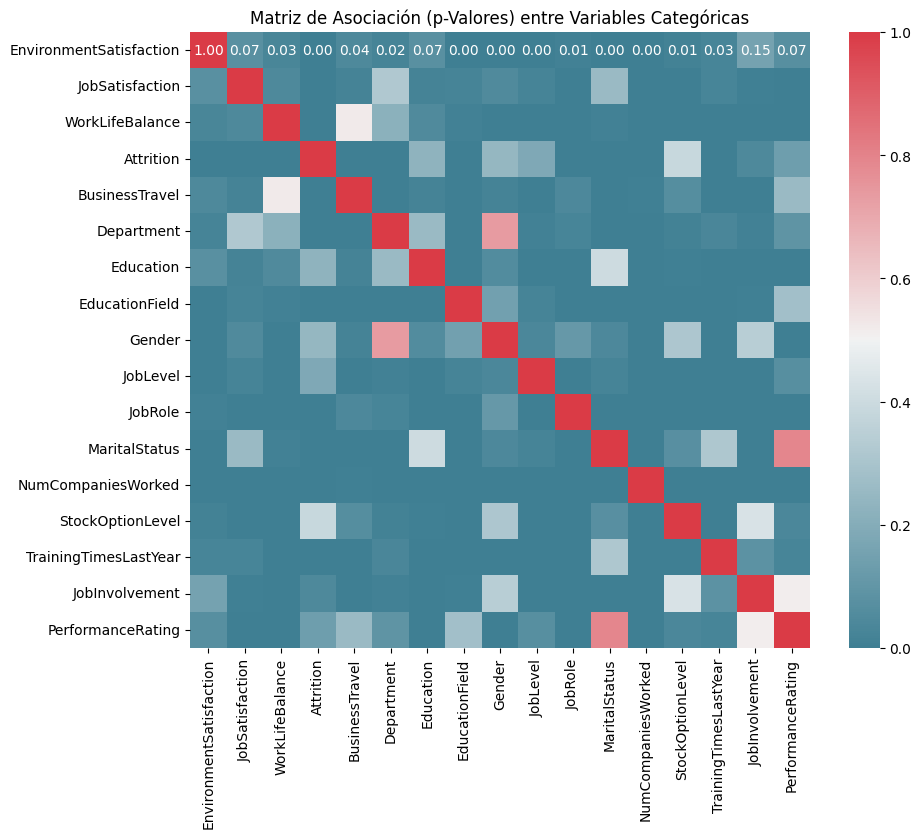

In [51]:
# Seleccionar solo las columnas categóricas
df_categoricas = df_no_nulos.select_dtypes(include=['category'])

# Crear una matriz vacía para almacenar los valores de p-valor
p_values = []

# Correlación de chi-cuadrado y los p-valores
for col1 in df_categoricas.columns:
    row_p_values = []
    for col2 in df_categoricas.columns:
        if col1 == col2:
            row_p_values.append(1.0)  # Poner 1.0 en la diagonal principal
        else:
            contingency_table = pd.crosstab(df_categoricas[col1], df_categoricas[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            row_p_values.append(p)
    p_values.append(row_p_values)

# Crear un DataFrame de p-valores
p_value_df = pd.DataFrame(p_values, columns=df_categoricas.columns, index=df_categoricas.columns)

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(p_value_df, annot=True, cmap=cmap, fmt=".2f")
plt.title("Matriz de Asociación (p-Valores) entre Variables Categóricas")
plt.show()

#### Attrition (Categorica) vs numericas

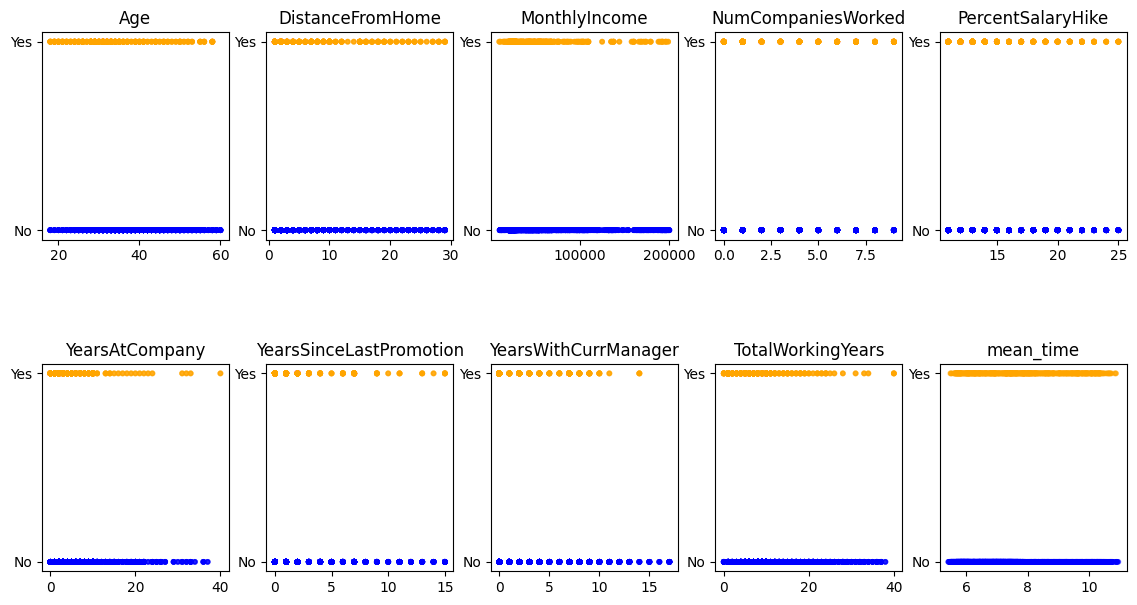

In [52]:
# Crear una figura con tres filas y cinco columnas
fig, axs = plt.subplots(2, 5, figsize=(14, 7))

# Crear los gráficos
for i, gráfico in enumerate(
    [
        'Age',
        'DistanceFromHome',
        'MonthlyIncome',
        'NumCompaniesWorked',
        'PercentSalaryHike',
        'YearsAtCompany',
        'YearsSinceLastPromotion',
        'YearsWithCurrManager',
        'TotalWorkingYears',
        'mean_time',
    ]
):
    # Crear un gráfico de dispersión para la variable numérica
    axs[i // 5, i % 5].scatter(
        df_no_nulos[gráfico], df_no_nulos['Attrition'], alpha=0.5, s=10, 
        c=df_no_nulos['Attrition'].map({'No': 'blue', 'Yes': 'orange'}),
    )
    # Agregar una leyenda
    axs[i // 5, i % 5].set_title(gráfico)
    # Ajustar el diseño de la figura
    plt.subplots_adjust(wspace=0.2, hspace=0.6)

# Mostrar la figura
plt.show()

#### Relación entre numericas

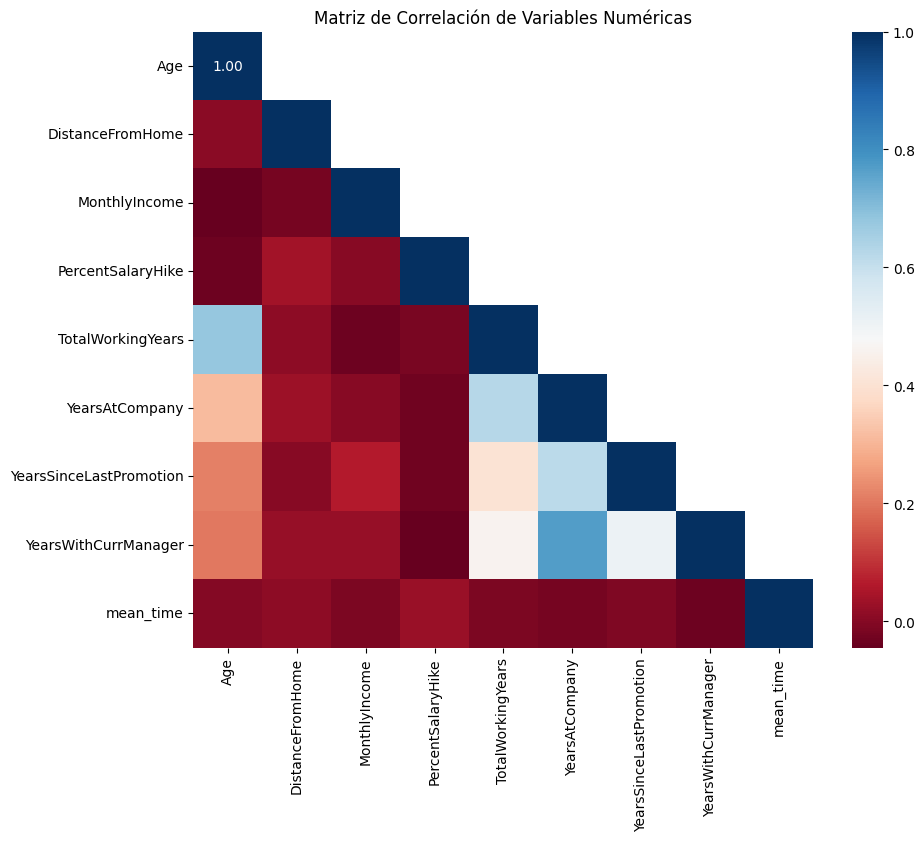

In [53]:
df_numericas = df_no_nulos.select_dtypes(include=[np.number])
correlation_matrix = df_numericas.corr()
mask = np.triu(correlation_matrix, k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", mask=mask)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

# d. Preparación de los datos

Elección de variables. Definición de dataset base

In [54]:
df_base = df_no_nulos

df_base = df_base.drop(['Age', 'DistanceFromHome', 'PercentSalaryHike', 'YearsAtCompany', 'mean_time', 'WorkLifeBalance', 'Department', 'Gender','PerformanceRating'], axis = 1)

In [55]:
#Impresión de dataset base
df_base.to_csv("df_base.csv")

# e. Selección de variables

# f. Selección y aplicación de algoritmos/ técnicas de modelado (al menos 3 algoritmos vistos en clase)